In [3]:
from IPython.display import display
import os
from dotenv import load_dotenv
from agents import Agent, Runner, function_tool
from agents.extensions.visualization import draw_graph

To track your order shipment, you can:

1. **Check Your Email**: Look for a confirmation email with a tracking number.
2. **Visit the Website**: Go to the order tracking section on our website.
3. **Enter Tracking Details**: Use your order number and email, or the tracking number.
4. **Use Carrier's Website**: Enter the tracking number on the shipping carrier’s site for more updates.

If you need more help, feel free to provide your order number!


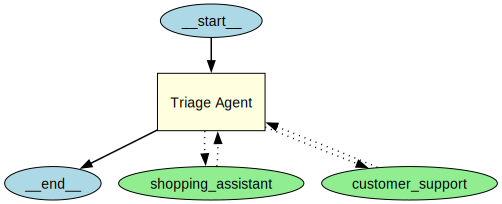

In [ ]:
# Define the specialized agents for shopping and support
@function_tool
def tester():
    print("This is a tester")

shopping_agent = Agent(
    name="Shopping Agent",
    instructions="You are a shopping assistant who can help with product searches and recommendations."
)
support_agent = Agent(
    name="Support Agent",
    instructions="You are a customer support assistant who can help with order issues, returns, and FAQs.",
    tools=[tester]
)

# Convert the specialized agents into tools by providing a name and description for each
shopping_tool = shopping_agent.as_tool(
    tool_name="shopping_assistant", 
    tool_description="Handle shopping-related queries (e.g. product recommendations, availability)."
)
support_tool = support_agent.as_tool(
    tool_name="customer_support", 
    tool_description="Handle customer support queries (e.g. returns, order status)."
)

# Create the triage/orchestrator agent that decides which tool (agent) to use
async def run_agent():
    triage_agent = Agent(
        name="Triage Agent",
        instructions="You are a triage agent. Determine if the user's request is about shopping or support, then use the appropriate tool to answer.",
        tools=[shopping_tool, support_tool]  # the triage agent can use the two agent-tools
    )

    # Run a sample query through the triage agent
    result =await Runner.run(starting_agent=triage_agent, input="How do I track my order shipment?")
    print(result.final_output)
    display(draw_graph(triage_agent))

# ✅ Step 4: Run the async agent function
await run_agent()

